In [1]:
import hipopy as hp
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
hep.style.use("CMS")
import glob
import uproot as ur

In [2]:
import time
import h5py

start_time = time.time()
data_directory = "/volatile/clas12/rmilton/processed_RICH_data_sector4_positives/"
file_name = "testing_RICH_saving.h5"

with h5py.File(f"{data_directory}{file_name}", "r") as f:
    # Inspect the file structure first:
    print("Top-level keys:", list(f.keys()))
    print("RICH_Hits contents:", list(f["RICH_Hits"].keys()))
    print("trajectories contents:", list(f["trajectories/RICH_aerogel_b1"].keys()))

    RICH_hits, rec_traj, truth_particles, rec_particles = {}, {}, {}, {}
    for entry in list(f["RICH_Hits"].keys()):
        RICH_hits[entry] = f[f"RICH_Hits/{entry}"][:].tolist()
    for entry in list(f["trajectories"].keys()):
        rec_traj[entry] = {}
        for subentry in list(f[f"trajectories/{entry}"].keys()):
            rec_traj[entry][subentry] = f[f"trajectories/{entry}/{subentry}"][:].tolist()
    for entry in list(f["truth_particles"].keys()):
        truth_particles[entry] = f[f"truth_particles/{entry}"][:].tolist()
    for entry in list(f["reconstructed_particles"].keys()):
        rec_particles[entry] = f[f"reconstructed_particles/{entry}"][:].tolist()

print(f"Took {time.time()-start_time} s")

Top-level keys: ['RICH_Hits', 'reconstructed_particles', 'trajectories', 'truth_particles']
RICH_Hits contents: ['RICH::Hit.time', 'RICH::Hit.x', 'RICH::Hit.y']
trajectories contents: ['REC::Traj.cx', 'REC::Traj.cy', 'REC::Traj.cz', 'REC::Traj.x', 'REC::Traj.y', 'REC::Traj.z']
Took 0.6631526947021484 s


In [3]:
RICH_hits = ak.Array(RICH_hits)
rec_particles = ak.Array(rec_particles)
truth_particles = ak.Array(truth_particles)
rec_traj = ak.Array(rec_traj)

### Making RICH hits distributions

Max: -41.609031677246094, Min: -151.1580810546875
Max + 10%: -37.44812850952148, Min-10%: -166.27388916015624


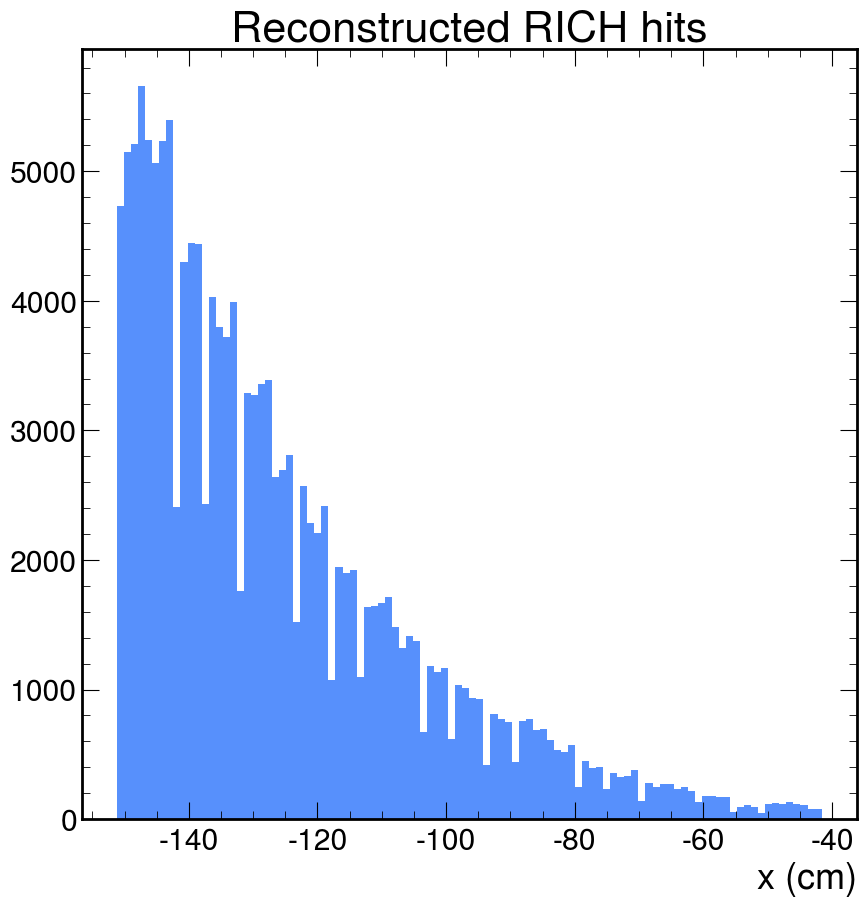

In [4]:
x_hits = ak.flatten(RICH_hits["RICH::Hit.x"])
plt.hist(x_hits, bins=100)
plt.xlabel("x (cm)")
plt.title("Reconstructed RICH hits")
max_hit, min_hit = max(x_hits), min(x_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit-.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 71.03700256347656, Min: -73.68699645996094
Max + 10%: 78.14070281982421, Min-10%: -81.05569610595703


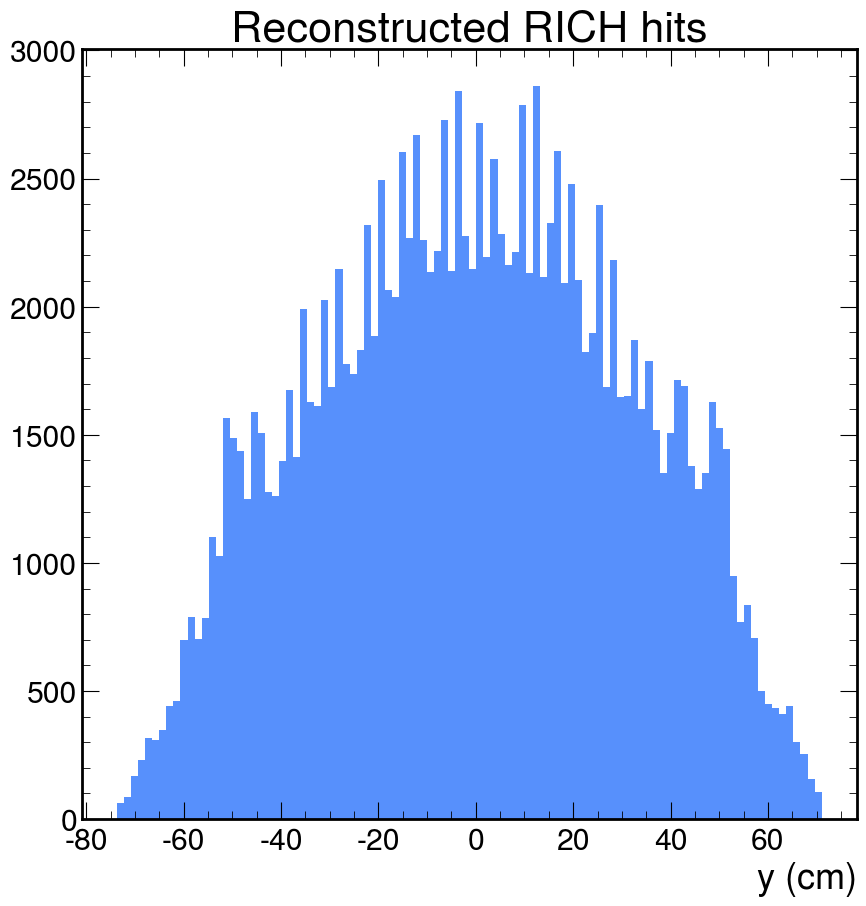

In [5]:
y_hits = ak.flatten(RICH_hits["RICH::Hit.y"])
plt.hist(y_hits, bins=100)
plt.xlabel("y (cm)")
plt.title("Reconstructed RICH hits")
max_hit, min_hit = max(y_hits), min(y_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 17651.0, Min: 141.0
Max + 10%: 19416.1, Min-10%: 126.9


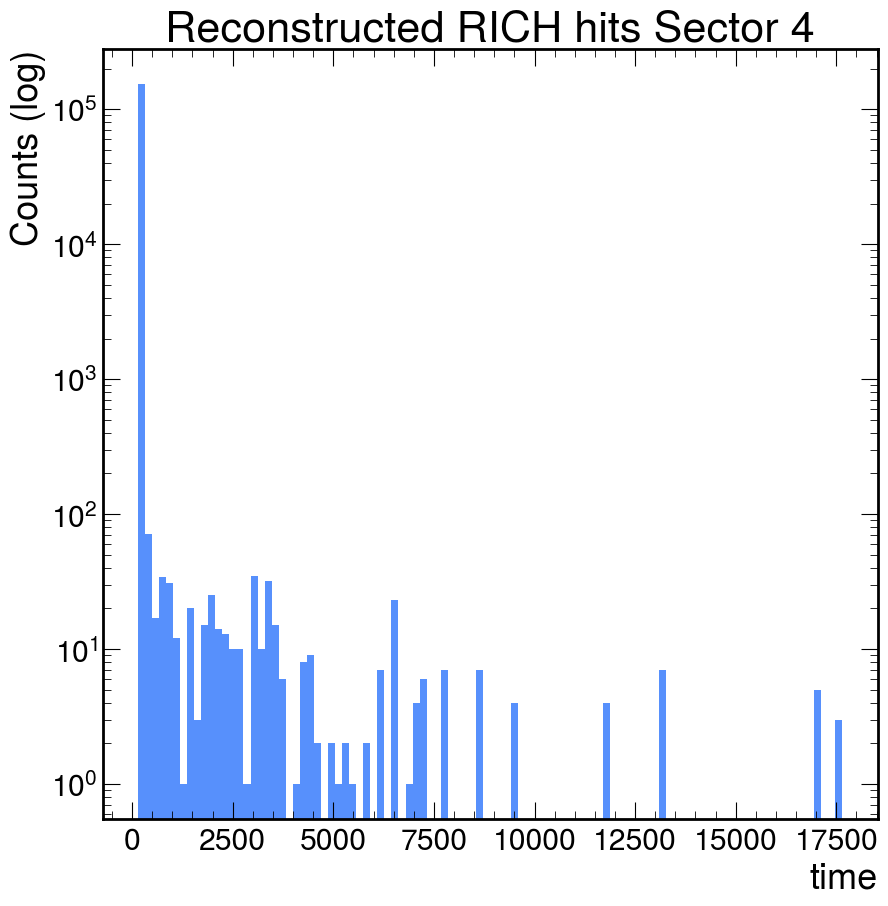

In [6]:
time_hits = ak.flatten(RICH_hits["RICH::Hit.time"])
plt.hist(time_hits, bins=100)
plt.xlabel("time")
plt.title("Reconstructed RICH hits Sector 4")
plt.yscale('log')
plt.ylabel("Counts (log)")
max_hit, min_hit = max(time_hits), min(time_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit-.1*min_hit}")

Max: -42.088680267333984, Min: -111.69890594482422
Max + 10%: -37.879812240600586, Min-10%: -122.86879653930664


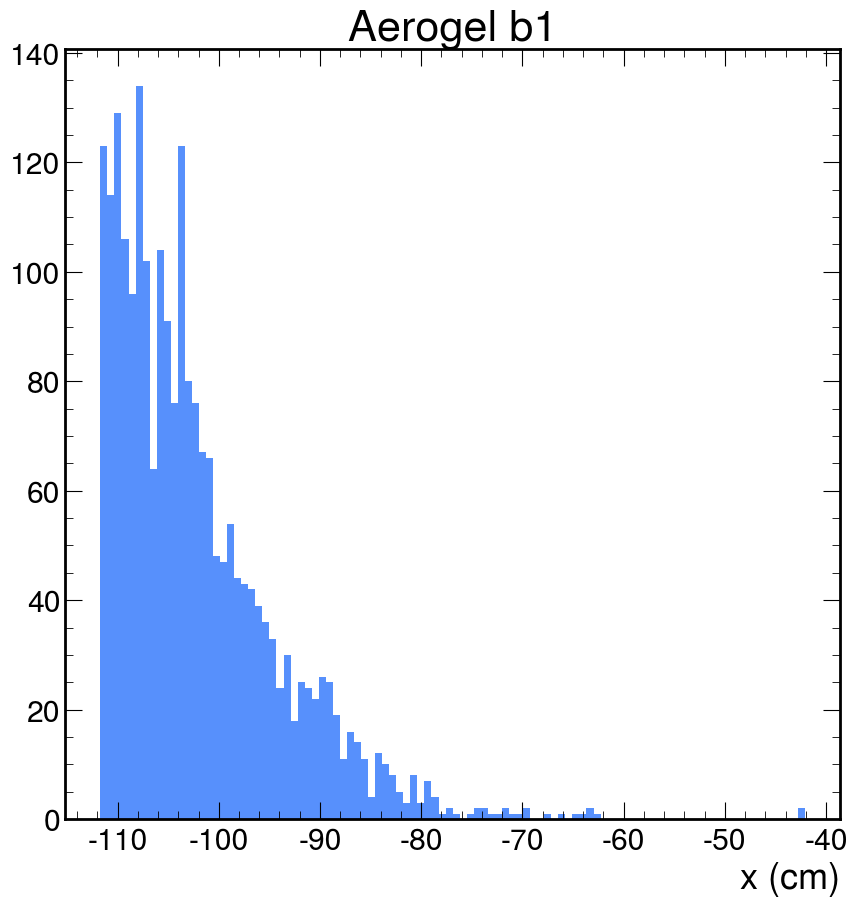

In [7]:
x_hits = ak.flatten(rec_traj["RICH_aerogel_b1"]["REC::Traj.x"])
plt.hist(x_hits, bins=100, label="Sector 1")
plt.xlabel("x (cm)")
plt.title("Aerogel b1")
max_hit, min_hit = max(x_hits), min(x_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit-.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 39.40719985961914, Min: -40.5496940612793
Max + 10%: 43.34791984558105, Min-10%: -44.60466346740723


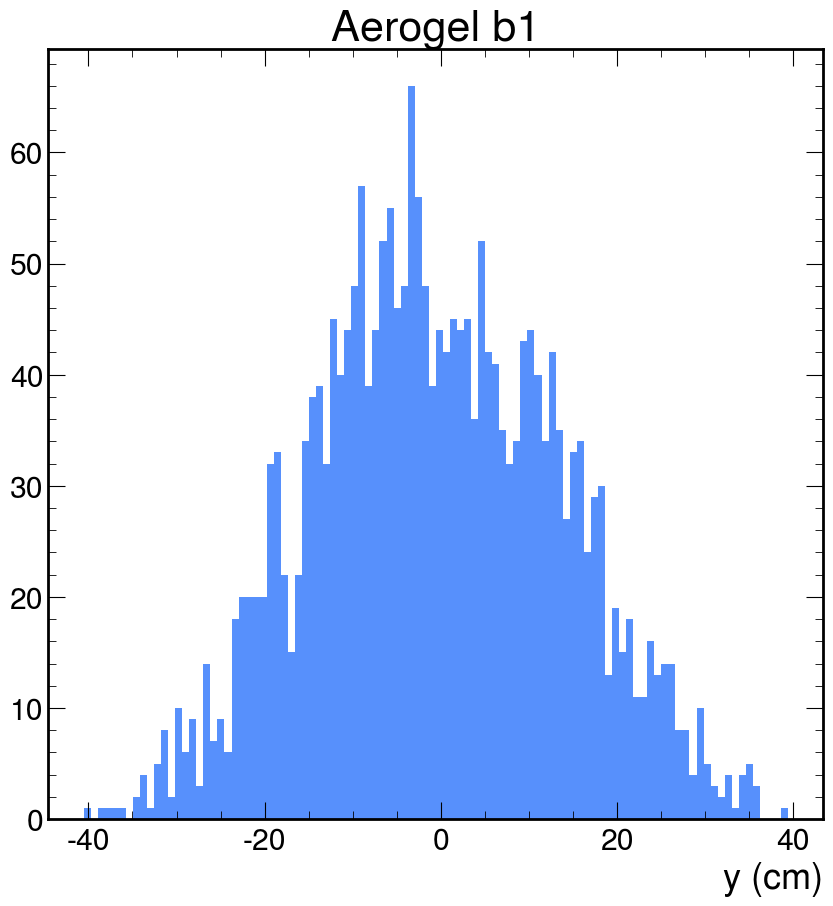

In [8]:
y_hits = ak.flatten(rec_traj["RICH_aerogel_b1"]["REC::Traj.y"])
plt.hist(y_hits, bins=100)
plt.xlabel("y (cm)")
plt.title("Aerogel b1")
max_hit, min_hit = max(y_hits), min(y_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 588.9347534179688, Min: 556.4869384765625
Max + 10%: 647.8282287597656, Min-10%: 500.83824462890624


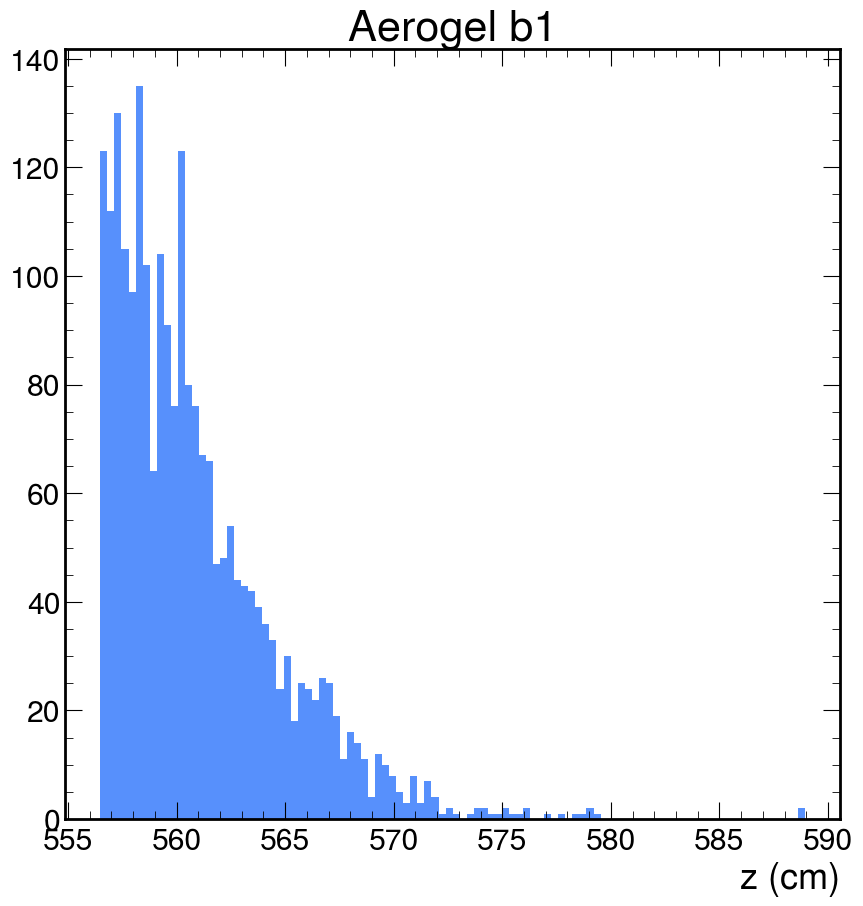

In [23]:
z_hits = ak.flatten(rec_traj["RICH_aerogel_b1"]["REC::Traj.z"])
plt.hist(z_hits, bins=100)
plt.xlabel("z (cm)")
plt.title("Aerogel b1")
max_hit, min_hit = max(z_hits), min(z_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit-.1*min_hit}")

Max: 0.19563862681388855, Min: -0.3947595953941345
Max + 10%: 0.2152024894952774, Min-10%: -0.434235554933548


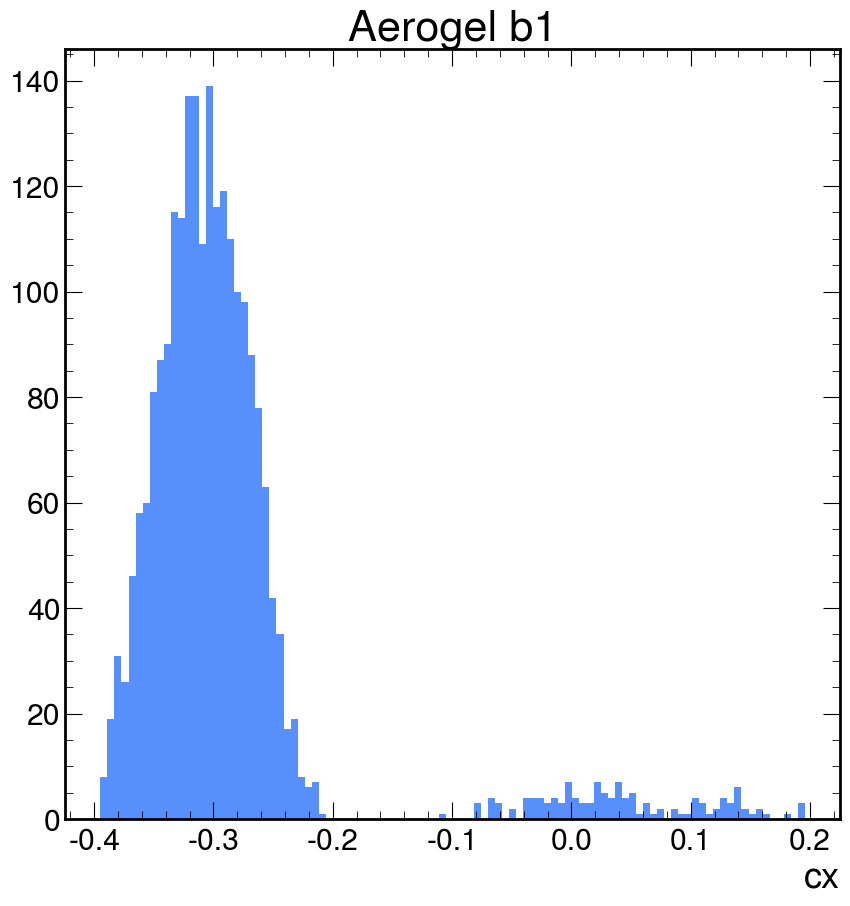

In [11]:
cx_hits = ak.flatten(rec_traj["RICH_aerogel_b1"]["REC::Traj.cx"])
plt.hist(cx_hits, bins=100)
plt.xlabel("cx")
plt.title("Aerogel b1")
max_hit, min_hit = max(cx_hits), min(cx_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.09994179010391235, Min: -0.17772004008293152
Max + 10%: 0.10993596911430359, Min-10%: -0.19549204409122467


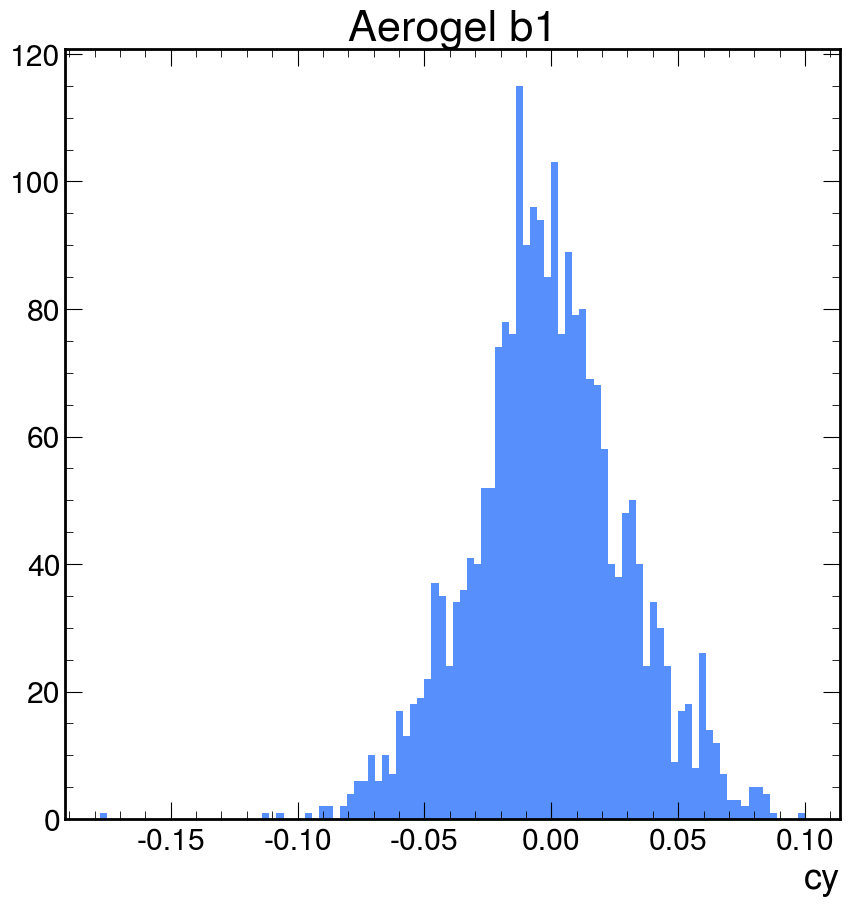

In [14]:
cy_hits = ak.flatten(rec_traj["RICH_aerogel_b1"]["REC::Traj.cy"])
plt.hist(cy_hits, bins=100)
plt.xlabel("cy")
plt.title("Aerogel b1")
max_hit, min_hit = max(cy_hits), min(cy_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.9999960660934448, Min: 0.918745756149292
Max + 10%: 1.0999956727027893, Min-10%: 1.0106203317642213


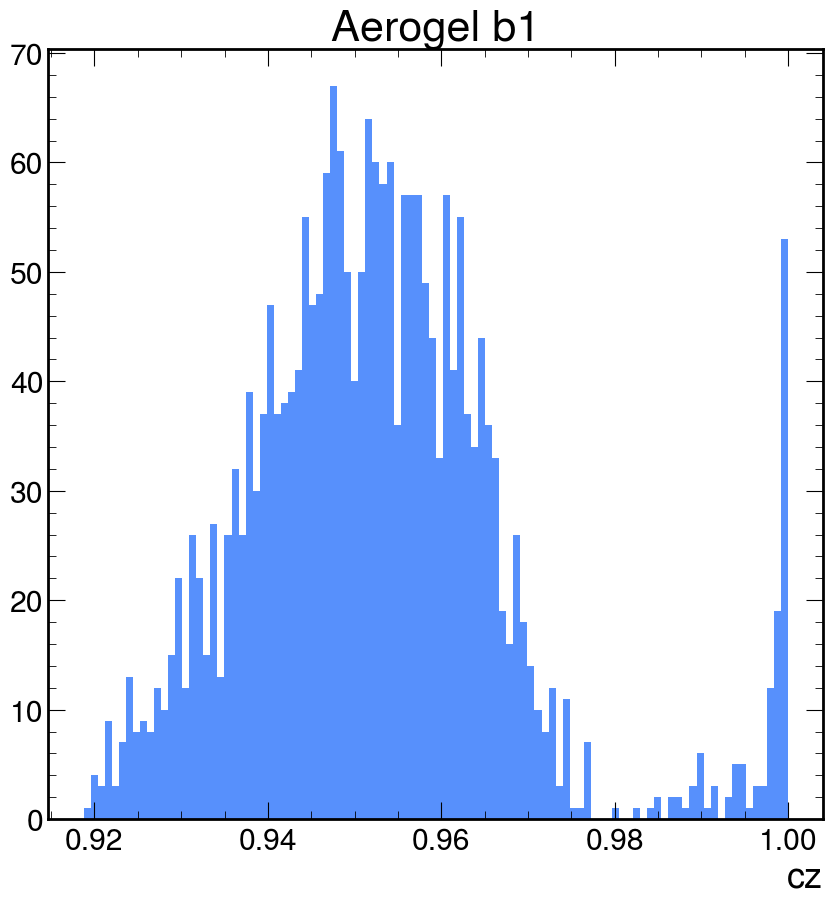

In [13]:
cz_hits = ak.flatten(rec_traj["RICH_aerogel_b1"]["REC::Traj.cz"])
plt.hist(cz_hits, bins=100)
plt.xlabel("cz")
plt.title("Aerogel b1")
max_hit, min_hit = max(cz_hits), min(cz_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: -110.84786987304688, Min: -166.1680450439453
Max + 10%: -99.7630828857422, Min-10%: -182.78484954833985


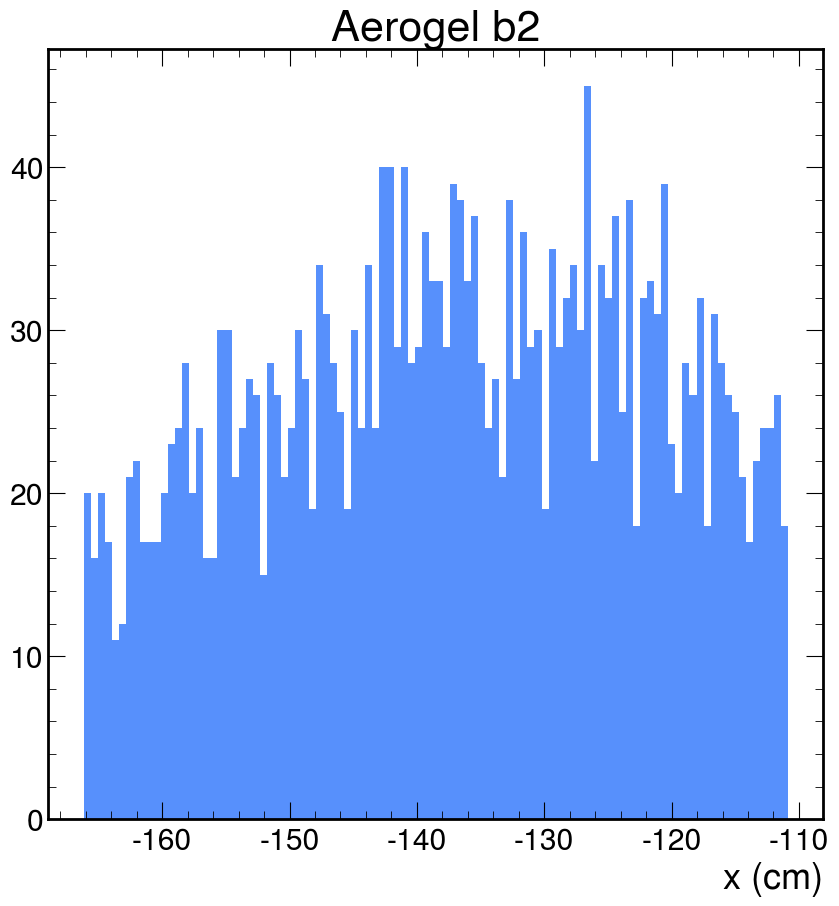

In [9]:
x_hits = ak.flatten(rec_traj["RICH_aerogel_b2"]["REC::Traj.x"])
plt.hist(x_hits, bins=100)
plt.xlabel("x (cm)")
plt.title("Aerogel b2")
max_hit, min_hit = max(x_hits), min(x_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit-.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 64.42669677734375, Min: -73.11834716796875
Max + 10%: 70.86936645507812, Min-10%: -80.43018188476563


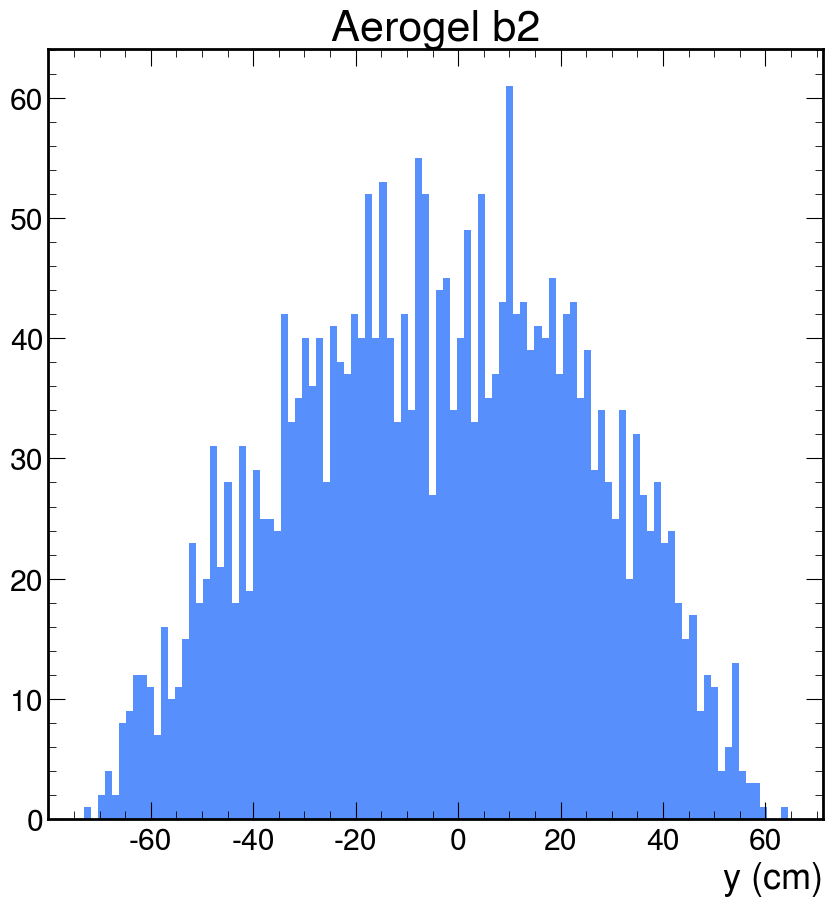

In [10]:
y_hits = ak.flatten(rec_traj["RICH_aerogel_b2"]["REC::Traj.y"])
plt.hist(y_hits, bins=100, label="Sector 4")
plt.xlabel("y (cm)")
plt.title("Aerogel b2")
max_hit, min_hit = max(y_hits), min(y_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 556.8974609375, Min: 530.77783203125
Max + 10%: 612.58720703125, Min-10%: 477.700048828125


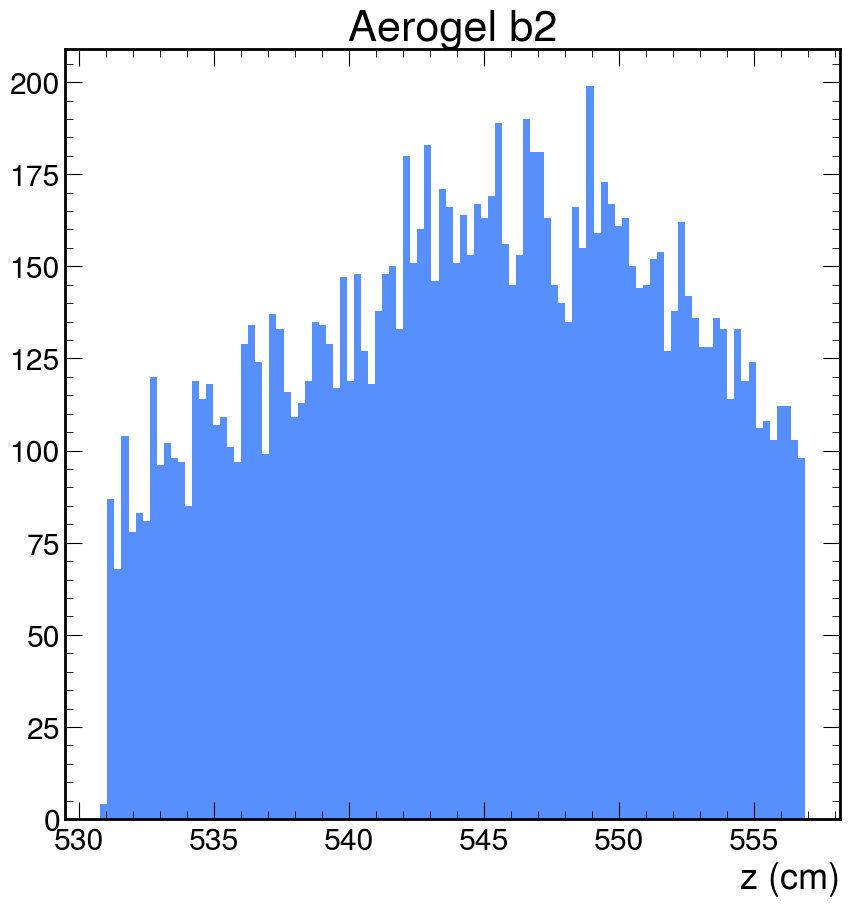

In [24]:
z_hits = ak.flatten(rec_traj["RICH_aerogel_b2"]["REC::Traj.z"])
plt.hist(z_hits, bins=100)
plt.xlabel("z (cm)")
plt.title("Aerogel b2")
max_hit, min_hit = max(z_hits), min(z_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit-.1*min_hit}")

Max: 0.19247666001319885, Min: -0.629761278629303
Max + 10%: 0.21172432601451874, Min-10%: -0.6927374064922333


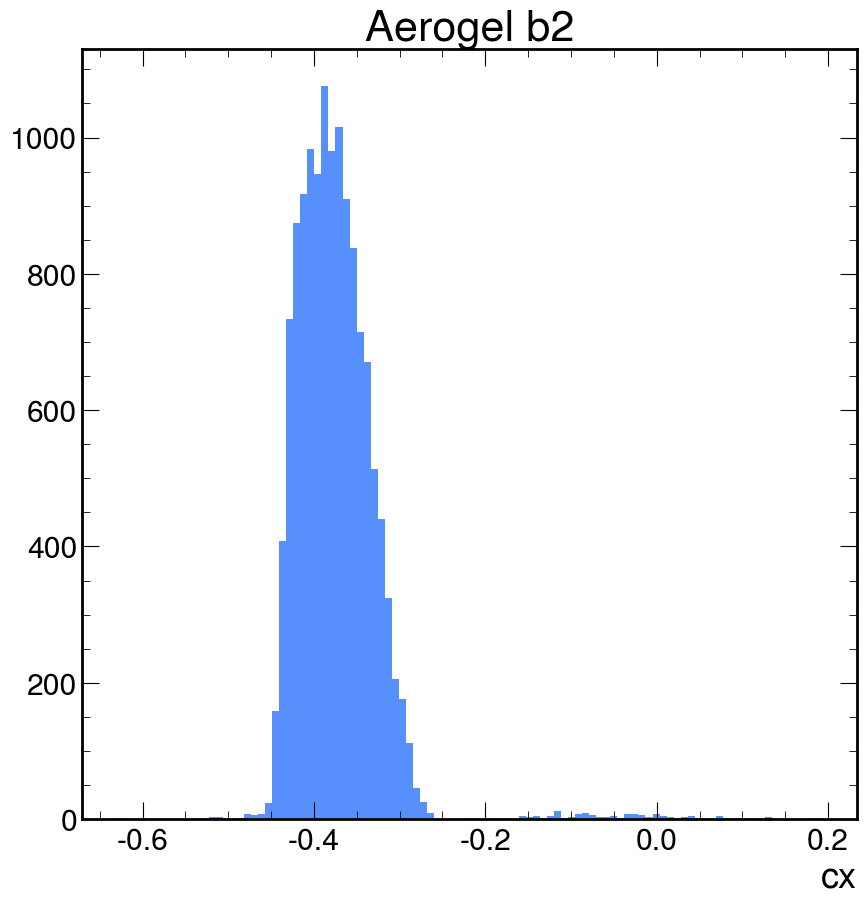

In [16]:
cx_hits = ak.flatten(rec_traj["RICH_aerogel_b2"]["REC::Traj.cx"])
plt.hist(cx_hits, bins=100)
plt.xlabel("cx")
plt.title("Aerogel b2")
max_hit, min_hit = max(cx_hits), min(cx_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.19180791079998016, Min: -0.17772004008293152
Max + 10%: 0.21098870187997817, Min-10%: -0.19549204409122467


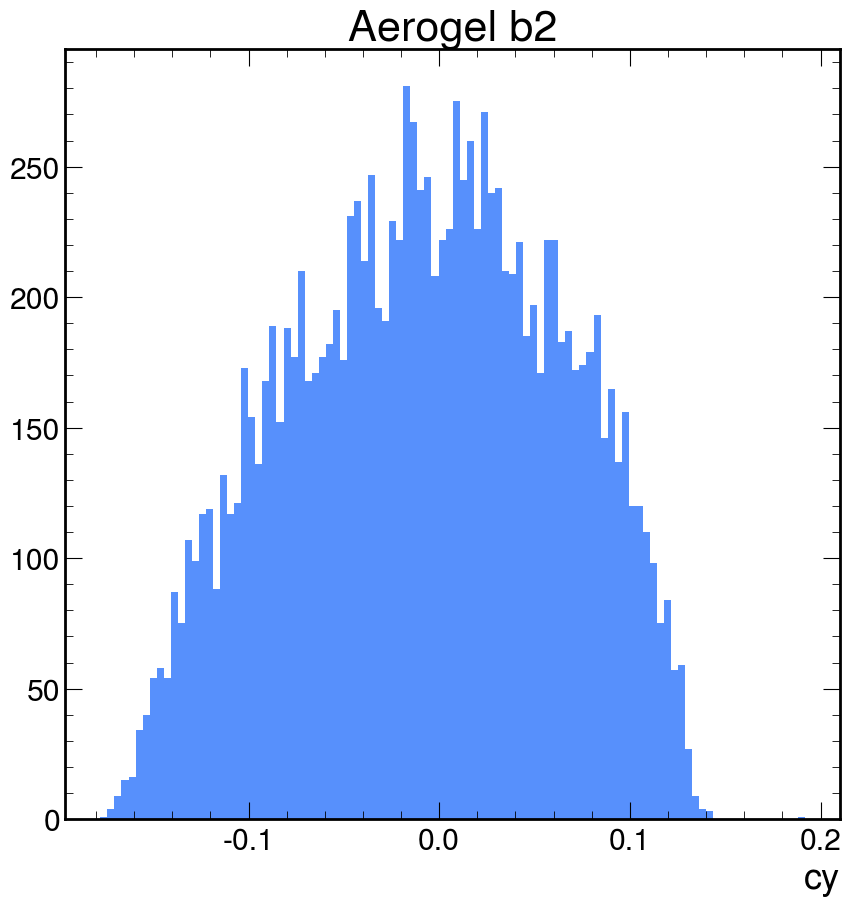

In [17]:
cy_hits = ak.flatten(rec_traj["RICH_aerogel_b2"]["REC::Traj.cy"])
plt.hist(cy_hits, bins=100)
plt.xlabel("cy")
plt.title("Aerogel b2")
max_hit, min_hit = max(cy_hits), min(cy_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.999989926815033, Min: 0.7767386436462402
Max + 10%: 1.0999889194965362, Min-10%: 0.8544125080108642


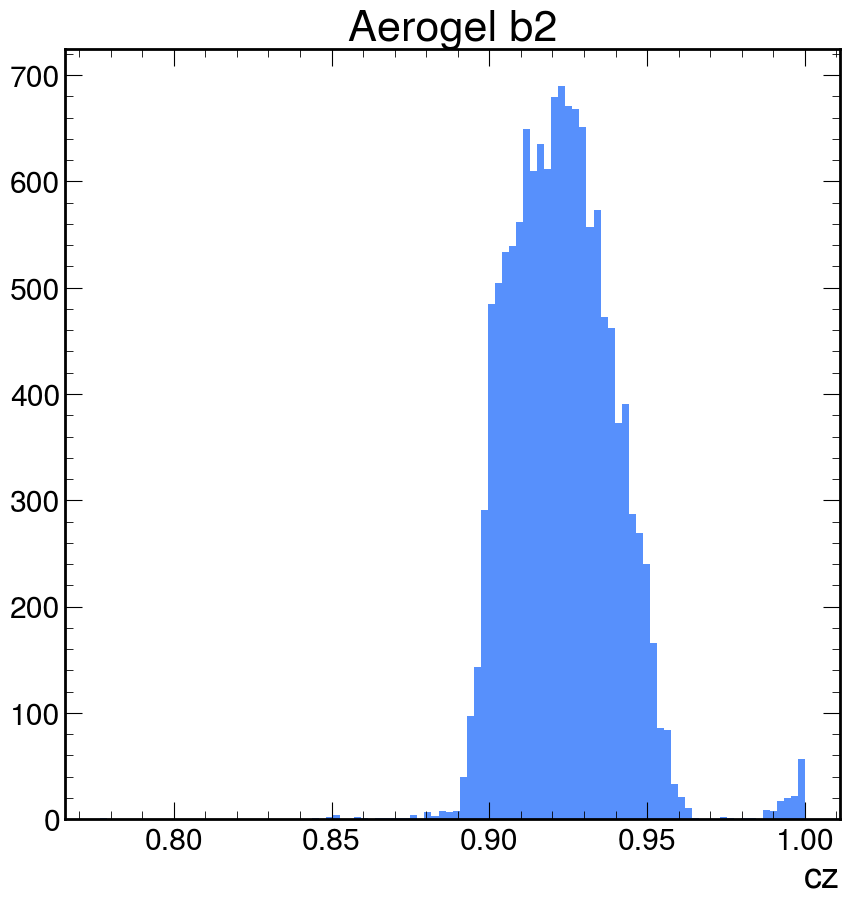

In [18]:
cz_hits = ak.flatten(rec_traj["RICH_aerogel_b2"]["REC::Traj.cz"])
plt.hist(cz_hits, bins=100)
plt.xlabel("cz")
plt.title("Aerogel b2")
max_hit, min_hit = max(cz_hits), min(cz_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: -166.9889678955078, Min: -221.6924591064453
Max + 10%: -150.29007110595703, Min-10%: -243.86170501708983


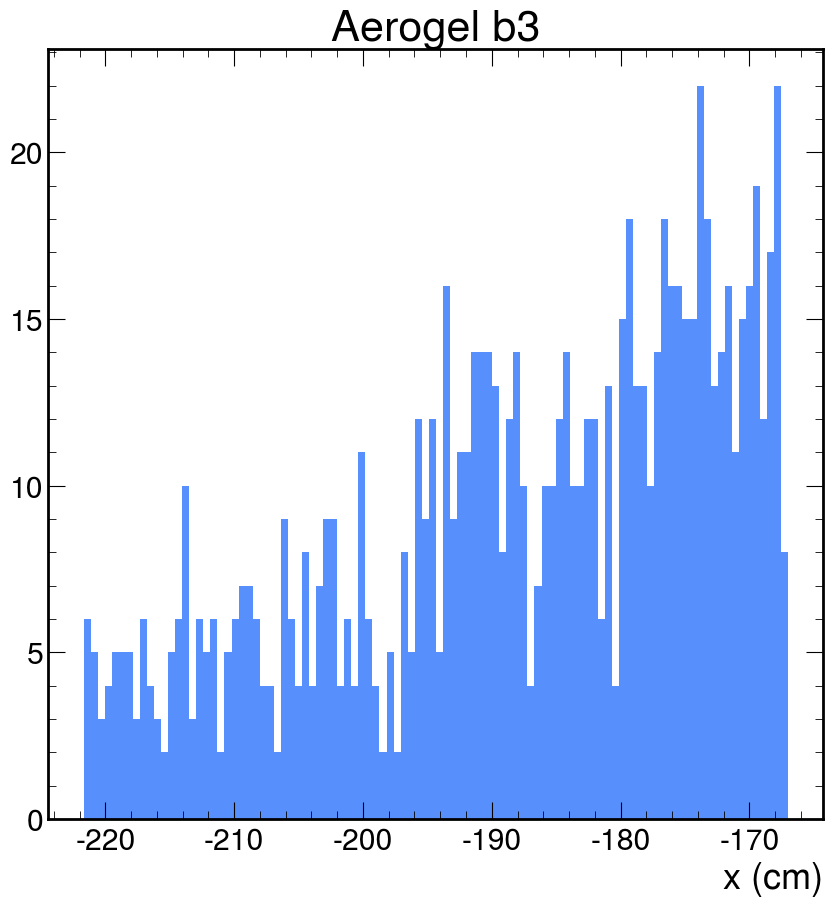

In [11]:
x_hits = ak.flatten(rec_traj["RICH_aerogel_b3"]["REC::Traj.x"])
plt.hist(x_hits, bins=100)
plt.xlabel("x (cm)")
plt.title("Aerogel b3")
max_hit, min_hit = max(x_hits), min(x_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit-.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 80.64035034179688, Min: -106.83934020996094
Max + 10%: 88.70438537597656, Min-10%: -117.52327423095703


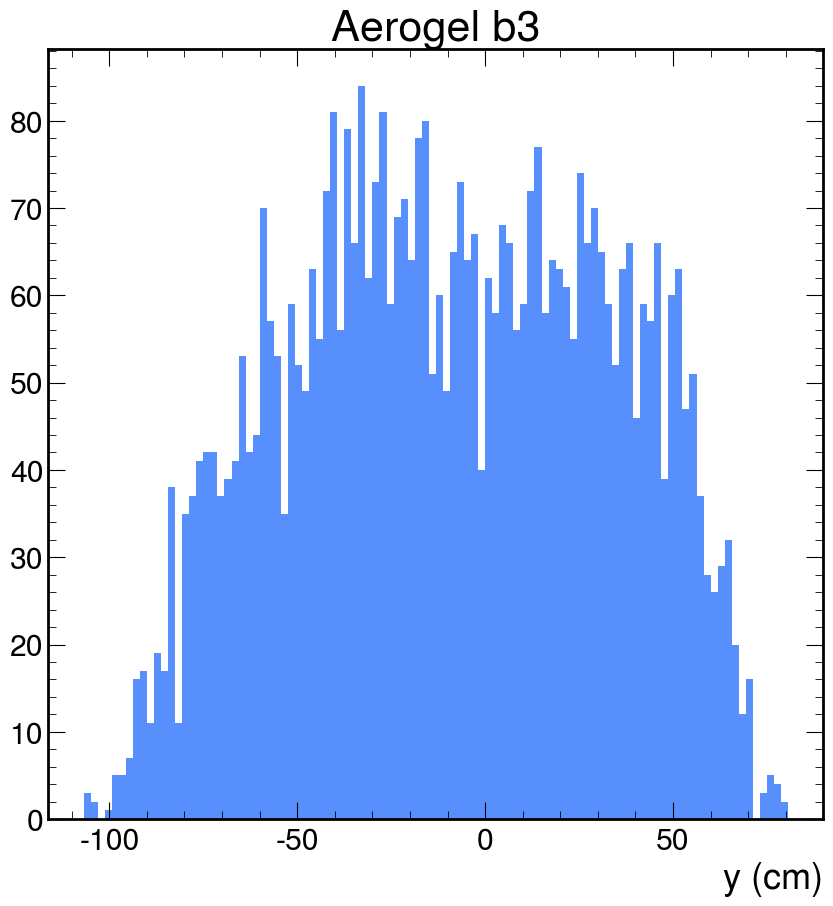

In [25]:
y_hits = ak.flatten(rec_traj["RICH_aerogel_b3"]["REC::Traj.y"])
plt.hist(y_hits, bins=100, label="Sector 1")
plt.xlabel("y (cm)")
plt.title("Aerogel b3")
max_hit, min_hit = max(y_hits), min(y_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 530.509033203125, Min: 504.4754638671875
Max + 10%: 583.5599365234375, Min-10%: 454.0279174804688


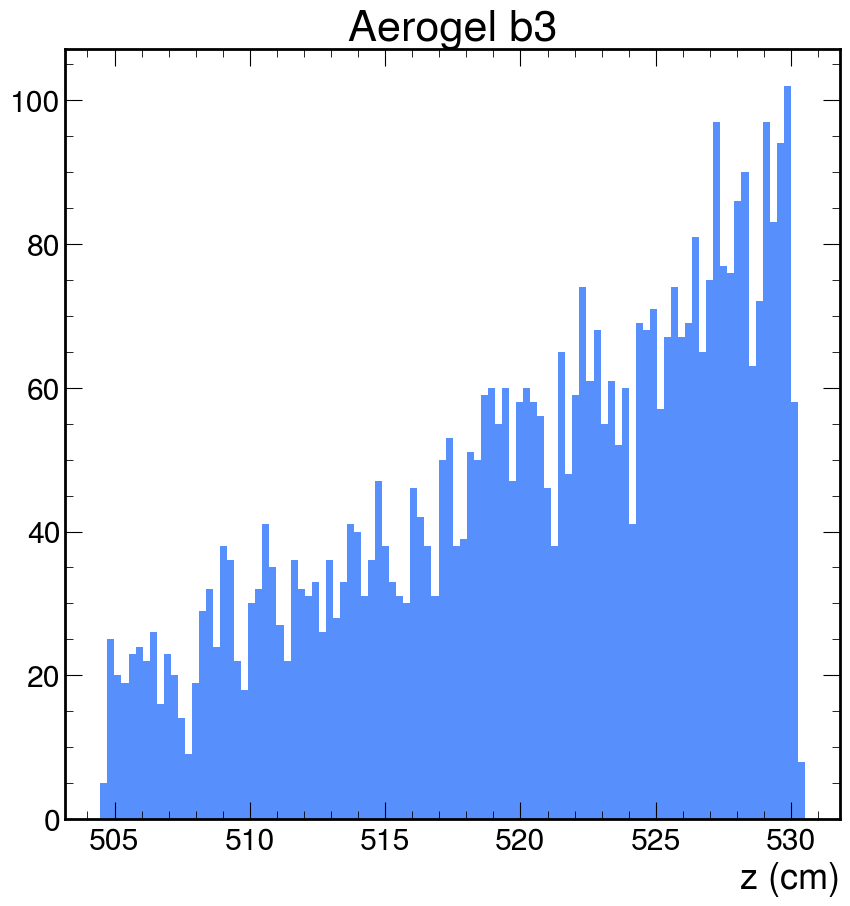

In [26]:
z_hits = ak.flatten(rec_traj["RICH_aerogel_b3"]["REC::Traj.z"])
plt.hist(z_hits, bins=100)
plt.xlabel("z (cm)")
plt.title("Aerogel b3")
max_hit, min_hit = max(z_hits), min(z_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit-.1*min_hit}")

Max: 0.02241019904613495, Min: -0.6885079145431519
Max + 10%: 0.024651218950748444, Min-10%: -0.757358705997467


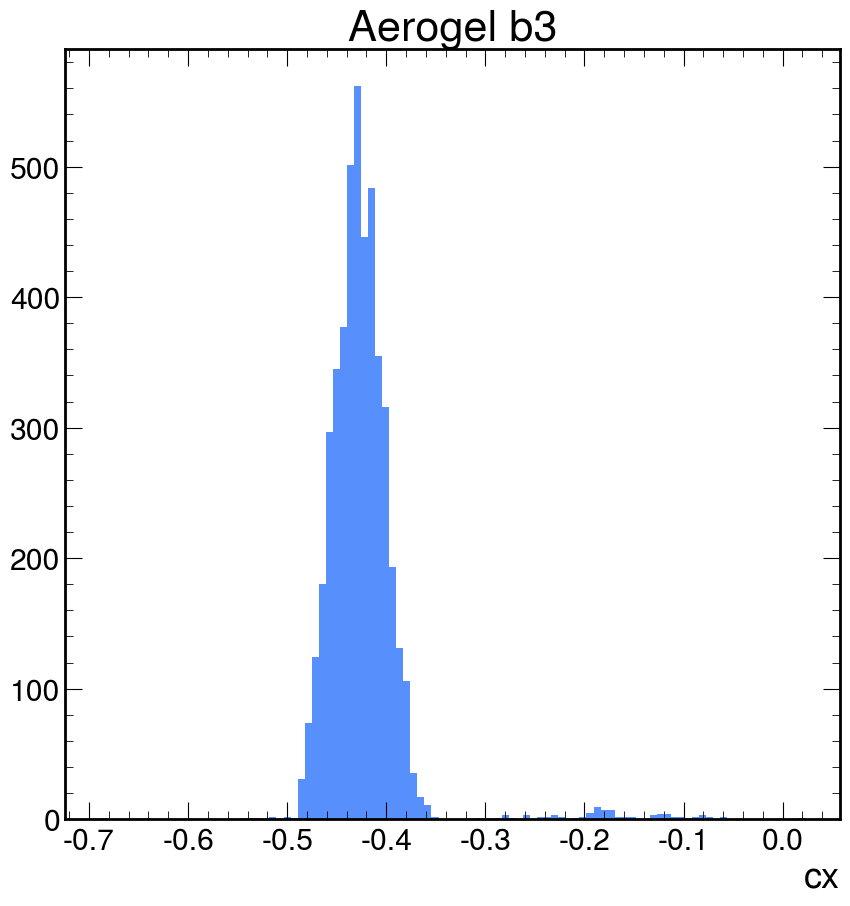

In [19]:
cx_hits = ak.flatten(rec_traj["RICH_aerogel_b3"]["REC::Traj.cx"])
plt.hist(cx_hits, bins=100)
plt.xlabel("cx")
plt.title("Aerogel b3")
max_hit, min_hit = max(cx_hits), min(cx_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.16473399102687836, Min: -0.21763114631175995
Max + 10%: 0.1812073901295662, Min-10%: -0.23939426094293595


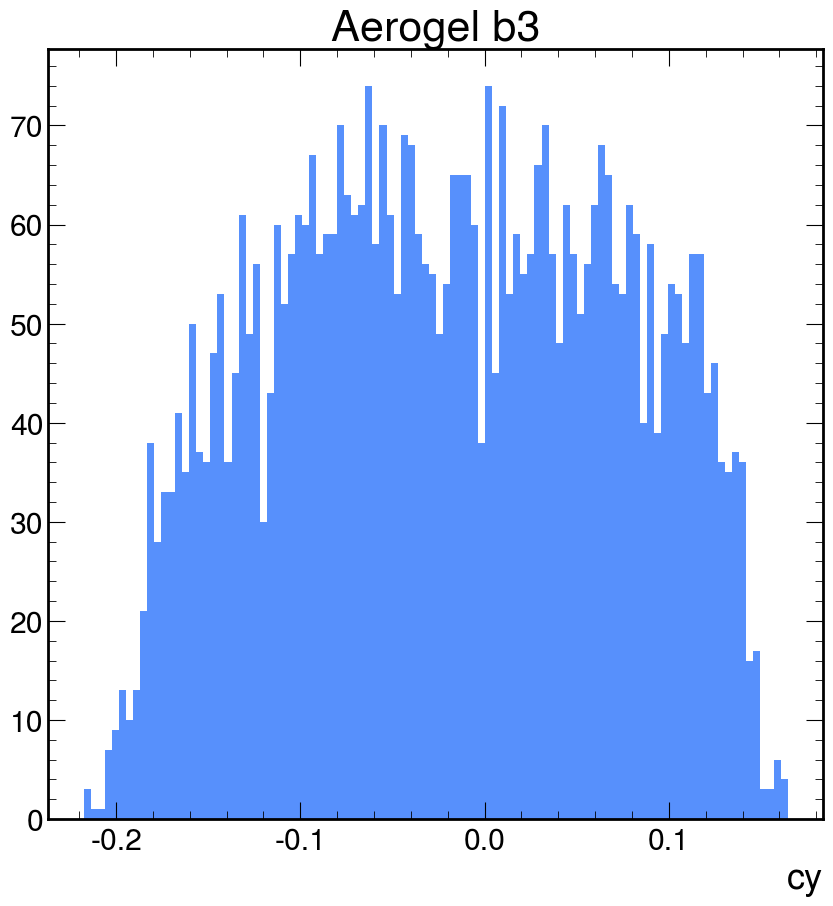

In [20]:
cy_hits = ak.flatten(rec_traj["RICH_aerogel_b3"]["REC::Traj.cy"])
plt.hist(cy_hits, bins=100)
plt.xlabel("cy")
plt.title("Aerogel b3")
max_hit, min_hit = max(cy_hits), min(cy_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.9997343420982361, Min: 0.7249122262001038
Max + 10%: 1.0997077763080596, Min-10%: 0.7974034488201142


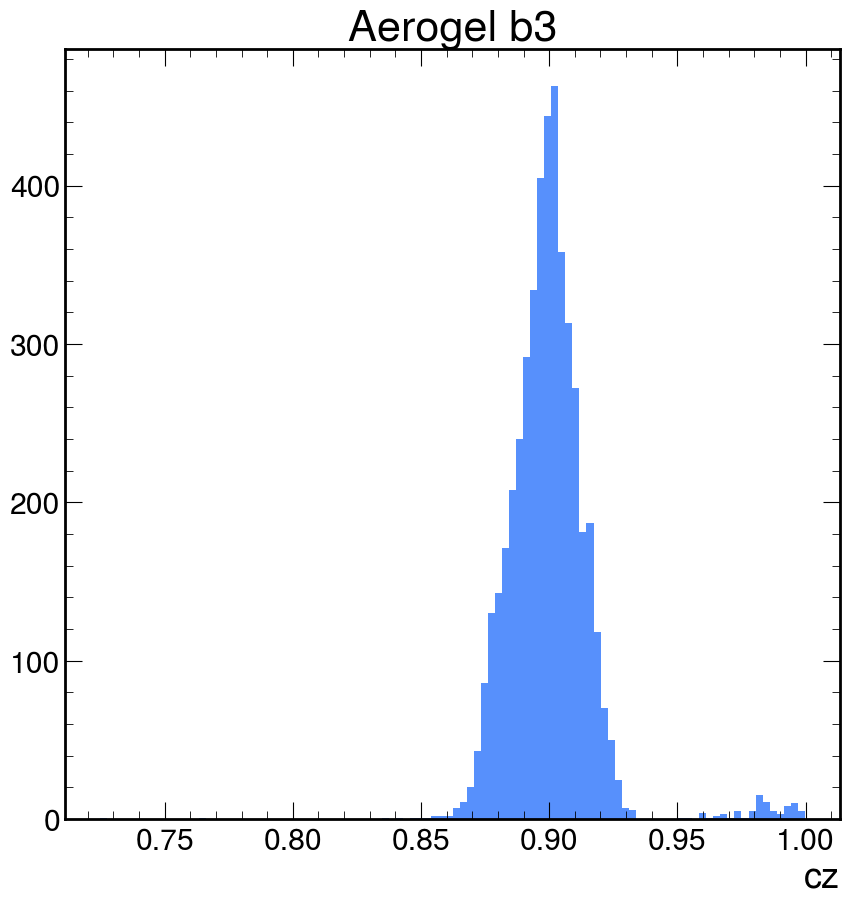

In [21]:
cz_hits = ak.flatten(rec_traj["RICH_aerogel_b3"]["REC::Traj.cz"])
plt.hist(cz_hits, bins=100)
plt.xlabel("cz")
plt.title("Aerogel b3")
max_hit, min_hit = max(cz_hits), min(cz_hits)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: -0.15209373831748962, Min: -2.7293014526367188
Max + 10%: -0.13688436448574065, Min-10%: -3.0022315979003906


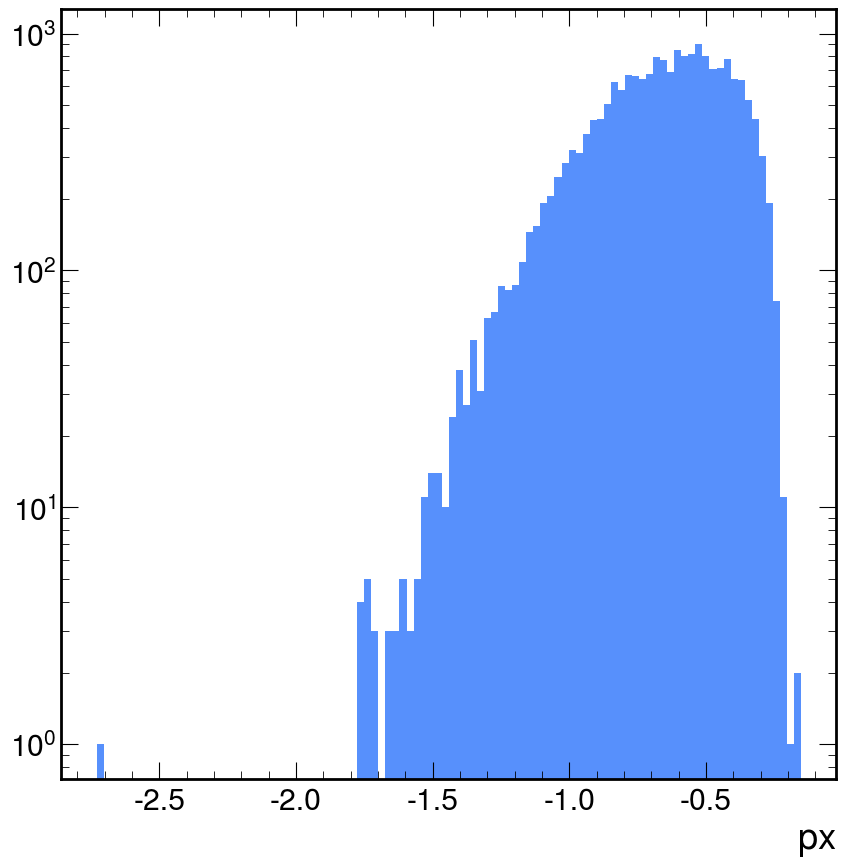

In [27]:
px = ak.flatten(rec_particles["REC::Particles.px"])
plt.hist(px, bins=100)
plt.xlabel("px")
max_hit, min_hit = max(px), min(px)
plt.yscale('log')
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit-.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 0.8522315621376038, Min: -0.5025393962860107
Max + 10%: 0.7670084059238433, Min-10%: -0.5527933359146118


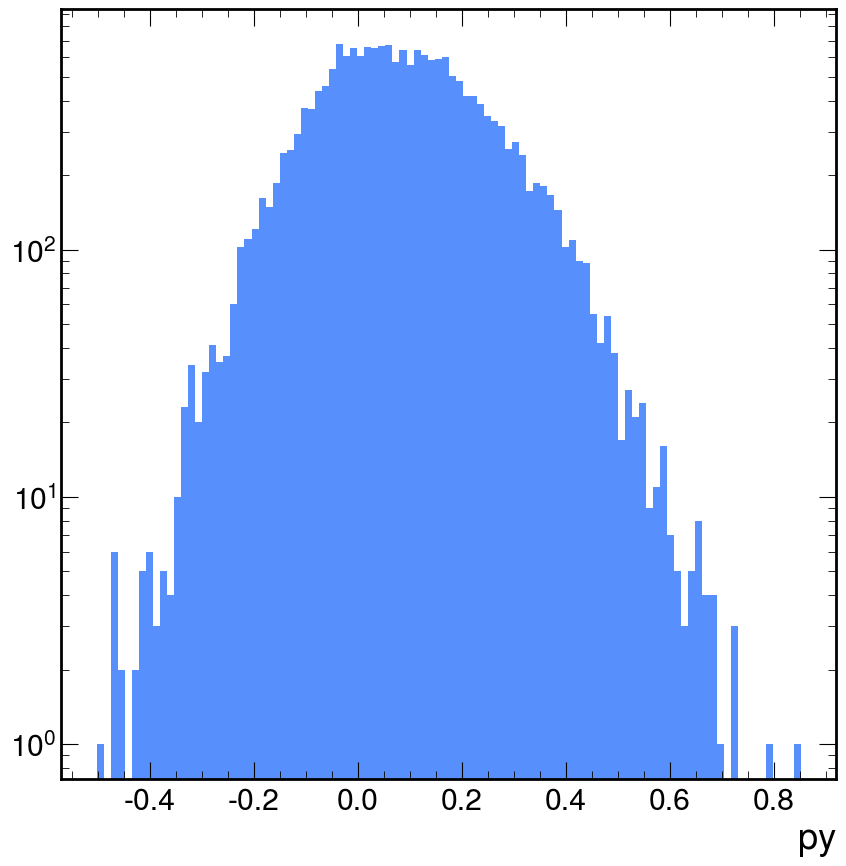

In [28]:
py = ak.flatten(rec_particles["REC::Particles.py"])
plt.hist(py, bins=100)
plt.xlabel("py")
max_hit, min_hit = max(py), min(py)
plt.yscale('log')
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit-.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")

Max: 10.630972862243652, Min: 1.3554924726486206
Max + 10%: 11.694070148468018, Min-10%: 1.4910417199134827


Text(0, 1, 'Counts (log)')

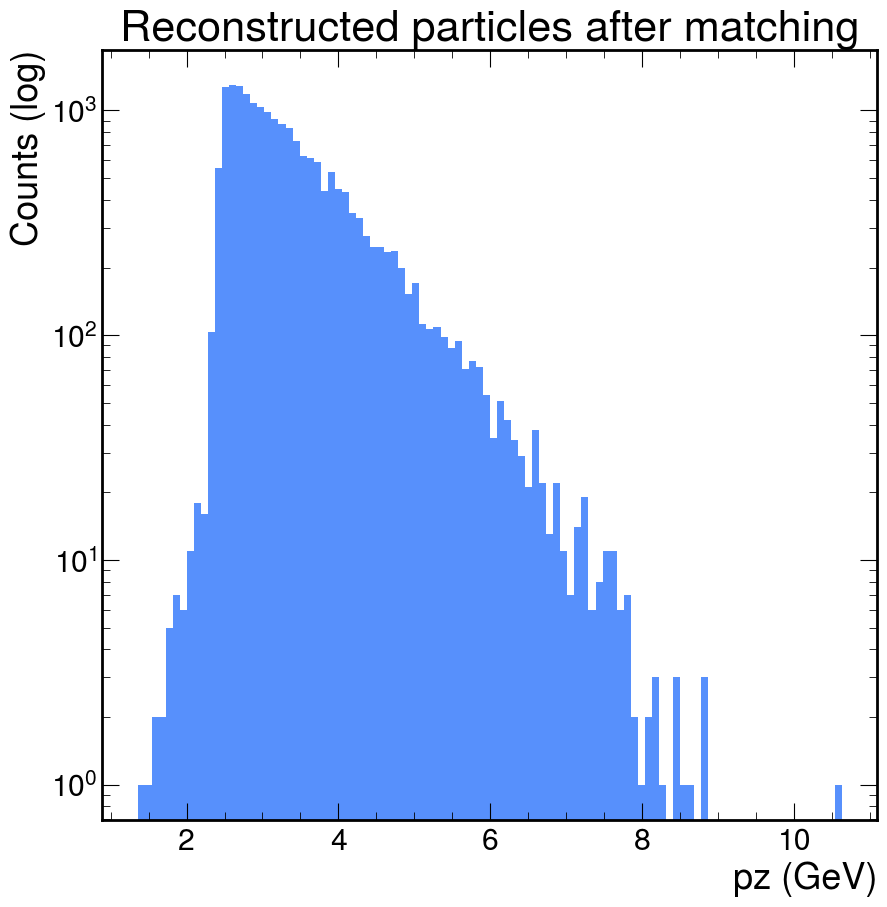

In [30]:
pz = ak.flatten(rec_particles["REC::Particles.pz"])
plt.hist(pz, bins=100)
plt.xlabel("pz (GeV)")
plt.yscale('log')
max_hit, min_hit = max(pz), min(pz)
print(f"Max: {max_hit}, Min: {min_hit}")
print(f"Max + 10%: {max_hit+.1*max_hit}, Min-10%: {min_hit+.1*min_hit}")
plt.title("Reconstructed particles after matching")
plt.ylabel("Counts (log)")